In [1]:
%matplotlib inline

# Introduction to `VPlants.AutoWIG` package 

We aim to present choices made in `VPlants.AutoWIG` package in order to propose clear and reusable python bindings for C++ libraries.
These choices are largely based on [Tamás Szelei's coding blog](http://szelei.me/code-generator/).
This is illustrated using a simple library called `libtest` which can be found in the `test` directory of package's root directory.

In [2]:
from path import path
libtestpath = path('../test/libtest')
includes = list((libtestpath/'src'/'cpp').walkfiles('*.h'))
examples = list((libtestpath/'example').walkfiles('*.py'))
print 'Include files:', '\n               '.join(str(include) for include in includes)

Include files: ../test/libtest/src/cpp/enums.h
               ../test/libtest/src/cpp/classes.h
               ../test/libtest/src/cpp/variables.h
               ../test/libtest/src/cpp/functions.h


A tool for easing code (encoded in files or in python strings) visualization is available

## The pipeline of `VPlants.AutoWIG` package 

### Building the abstract syntax tree from headers

In [3]:
from vplants.autowig.ast import AbstractSyntaxTree
ast = AbstractSyntaxTree(*includes)
ast

TRANSLATION_UNIT /tmp/tmpP_ApGg (0)
  +--ENUM_DECL PolygonKind (1)
  |  +--ENUM_CONSTANT_DECL RECTANGLE (2)
  |  +--ENUM_CONSTANT_DECL TRIANGLE (3)
  +--ENUM_DECL  (4)
  |  +--ENUM_CONSTANT_DECL ZERO (5)
  |  +--ENUM_CONSTANT_DECL ONE (6)
  |  +--ENUM_CONSTANT_DECL TWO (7)
  +--CLASS_DECL Polygon (8)
  |  +--CXX_ACCESS_SPEC_DECL  (9)
  |  +--CONSTRUCTOR Polygon (10)
  |  |  +--PARM_DECL _width (11)
  |  |  +--PARM_DECL _height (12)
  |  +--CONSTRUCTOR Polygon (13)
  |  |  +--PARM_DECL _polygon (14)
  |  |     +--TYPE_REF class Polygon (15)
  |  +--DESTRUCTOR ~Polygon (16)
  |  +--CXX_METHOD get_width (17)
  |  +--CXX_METHOD set_width (18)
  |  |  +--PARM_DECL _width (19)
  |  +--CXX_METHOD get_height (20)
  |  +--CXX_METHOD set_height (21)
  |  |  +--PARM_DECL _height (22)
  |  +--CXX_METHOD compute_area (23)
  |  +--CXX_METHOD copy (24)
  |  |  +--TYPE_REF class Polygon (25)
  |  +--CXX_ACCESS_SPEC_DECL  (26)
  |  +--FIELD_DECL width (27)
  |  +--FIELD_DECL height (28)
  +--CLASS_DECL

### Building the abstract semantic graph from the abstract syntax tree

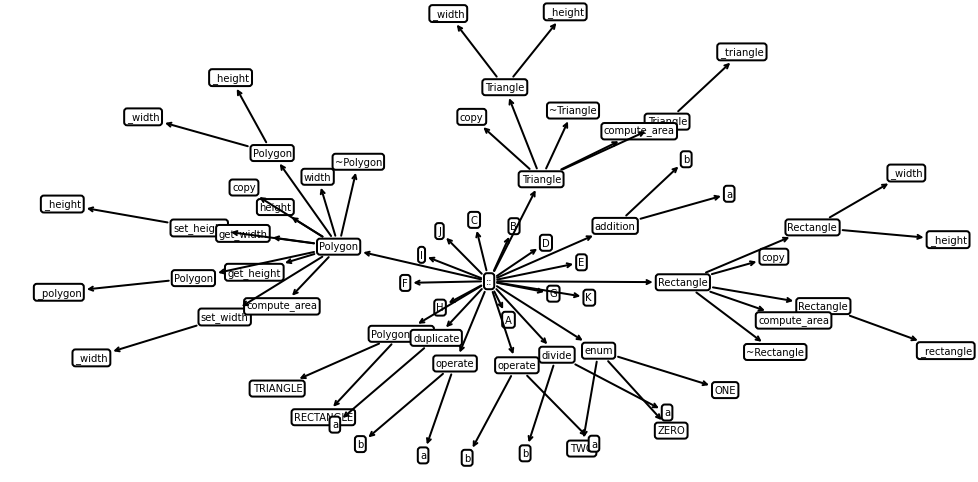

In [4]:
from vplants.autowig.asg import AbstractSemanticGraph
asg = AbstractSemanticGraph(ast)
asg

### Traverse the abstract semantic graph to generate Python bindings